Threshold 0.3: 90.00% sparsity


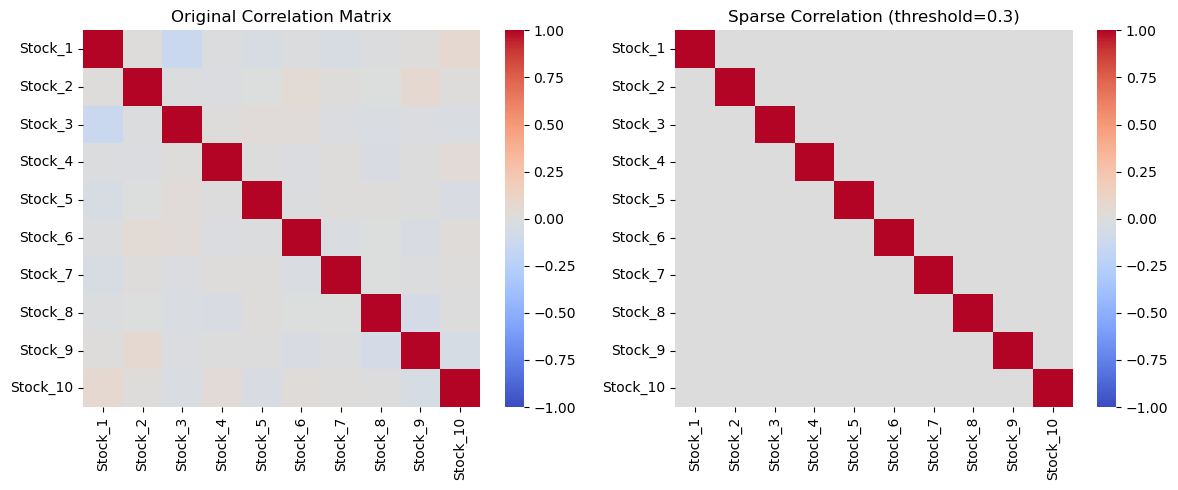

In [6]:

import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns

def sparsify_cov(returns, threshold=0.3):
    """Sparsify covariance matrix by zeroing small correlations"""
    # Calculate correlation matrix and apply threshold
    corr = returns.corr()
    sparse_corr = corr.copy()
    sparse_corr[np.abs(sparse_corr) < threshold] = 0
    np.fill_diagonal(sparse_corr.values, 1)
    
    # Convert to covariance matrix
    std = returns.std()
    sparse_cov = pd.DataFrame(np.outer(std, std) * sparse_corr, 
                             index=returns.columns, columns=returns.columns)
    
    # Ensure positive definiteness
    eigval, eigvec = linalg.eigh(sparse_cov)
    eigval[eigval < 1e-8] = 1e-8
    sparse_cov_pd = pd.DataFrame(eigvec @ np.diag(eigval) @ eigvec.T,
                               index=returns.columns, columns=returns.columns)
    
    return sparse_cov_pd, sparse_corr

# Load data and calculate returns
prices = pd.read_csv("synthetic_stock_prices.csv", index_col=0, parse_dates=True)
returns = prices.pct_change().dropna()

# Original correlation matrix for comparison
orig_corr = returns.corr()

# Apply sparsification with one threshold
threshold = 0.3
sparse_cov, sparse_corr = sparsify_cov(returns, threshold)

# Calculate sparsity
sparsity = 1 - (np.count_nonzero(sparse_corr) / sparse_corr.size)
print(f"Threshold {threshold}: {sparsity:.2%} sparsity")

# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(orig_corr, ax=ax1, cmap="coolwarm", vmin=-1, vmax=1)
ax1.set_title("Original Correlation Matrix")
sns.heatmap(sparse_corr, ax=ax2, cmap="coolwarm", vmin=-1, vmax=1)
ax2.set_title(f"Sparse Correlation (threshold={threshold})")
plt.tight_layout()
plt.show()



This simplified version:
- Shortens the function name for brevity
- Condenses the steps within the function
- Removes the multiple threshold testing loop, focusing on a single threshold
- Uses direct parsing of dates in the pandas read_csv function
- Simplifies the visualization code
- Maintains the core functionality: sparsifying a covariance matrix by zeroing small correlations while ensuring positive definiteness

The code still performs the key steps of the sparsification technique described in the paper while being shorter and more concise.
